# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
random_seed=123
le=LabelEncoder()
s=table_data[['species']]
s_new=np.ravel(s)
print(s_new)
le.fit(s_new)
#print(a)
res=le.transform(s_new)
#print(b)
table_data[['species']]=res

['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Quercus_Variabilis' 'Alnus_Sieboldiana' 'Quercus_Ilex'
 'Arundinaria_Simonii' 'Acer_Platanoids' 'Quercus_Phillyraeoides'
 'Cornus_Chinensis' 'Quercus_Phillyraeoides' 'Fagus_Sylvatica'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri' 'Tilia_Tomentosa'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Variabilis' 'Quercus_Hartwissiana'
 'Quercus_Kewensis' 'Quercus_Coccifera' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Quercus_Canarie

In [8]:
sss=StratifiedShuffleSplit(n_splits =1, test_size=0.2) 

In [9]:
#X=np.array(table_data.iloc[:, 2:])
data=np.array(table_data.iloc[:, 2:])
print(len(data))
numbers=np.array(table_data.iloc[:, 0])
print(numbers)
X=np.array(table_data)

990
[   1    2    3    5    6    8   10   11   14   15   17   18   20   21   22
   25   26   27   29   30   31   32   34   35   37   38   40   42   43   45
   48   49   50   54   55   56   58   60   61   63   64   66   67   69   71
   72   73   75   76   78   80   81   82   83   84   85   87   88   92  100
  101  103  106  107  108  109  115  116  118  120  122  124  127  129  130
  132  133  134  139  140  142  143  145  146  148  149  152  153  155  160
  163  164  165  166  167  168  169  171  173  175  178  179  183  186  188
  189  190  194  196  198  199  201  202  203  204  206  211  212  214  215
  216  217  218  219  224  225  227  228  231  233  235  237  238  239  240
  241  242  243  245  246  247  248  249  252  253  256  257  258  259  260
  262  263  265  267  268  269  270  273  275  278  280  282  283  286  288
  289  290  291  294  298  302  303  304  306  307  309  310  311  314  315
  317  319  321  322  323  324  325  326  327  328  329  330  331  333  334
  335  3

In [10]:
print(X)

[[  1.00000000e+00   3.00000000e+00   7.81200000e-03 ...,   4.88300000e-03
    0.00000000e+00   2.53910000e-02]
 [  2.00000000e+00   4.90000000e+01   5.85900000e-03 ...,   9.77000000e-04
    3.90620000e-02   2.24610000e-02]
 [  3.00000000e+00   6.50000000e+01   5.85900000e-03 ...,   0.00000000e+00
    2.05080000e-02   2.93000000e-03]
 ..., 
 [  1.58100000e+03   1.10000000e+01   1.95300000e-03 ...,   2.73440000e-02
    0.00000000e+00   1.95300000e-03]
 [  1.58200000e+03   7.80000000e+01   0.00000000e+00 ...,   0.00000000e+00
    1.95300000e-03   2.93000000e-03]
 [  1.58400000e+03   5.00000000e+01   2.34380000e-02 ...,   2.34380000e-02
    2.53910000e-02   2.24610000e-02]]


In [12]:
for train_index, test_index in sss.split(X, res):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_idx, test_idx, X_train, X_test= X[train_index][:, 0], X[test_index][:, 0], X[train_index][:, 2:], X[test_index][:, 2:]
    y_train, y_test = res[train_index], res[test_index]

TRAIN: [653 854 254 319 123 605  26 726 138 131 329 662 577 426 345 241 869 291
 121  46 244 697 487 736 251 445 274 791 225 642 696 743 664 403 281 628
  60 636 530 407 424 973  71  86 356 979 100 822 742  90 704 188 816 669
 511 810 866 488 427 667  66 386  76  97 929 212 417 980 419 234 954 738
 582 183 747 136 576 464  99  88 983 143 774 113  42  14 108 817 127  38
  59 457 692 637 410 328 170 298 215 550 837 462  93 758 146 767 477 654
 533 399 913 611 744 446 367 698 631 217 893 481 938 960 174 658   2 186
 563 751 895 240 982 438 152 130 519  15 762  48 531 543 428 630  47 914
  34 862 780 885 612 729 608 911 691 795 516 160 908 264 485 560 839 537
 624 915 912 880 235 633 116 453  91 555 768 357  67 770 679 926 223 849
 527  21 678 799 321 568  27 192 707 877 711 162  52 903 907 683 546 253
 787 366  73 988   7 573 618 363 650 128 598 764 600  53 373 580 167  84
 104 844 588 917 110 753 645 327 820  37 773  61 270 772 807 480 271 663
 561 199 897 334 280  41 469 617 840 378 702

In [13]:
print(len(X_train))

792


Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [14]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


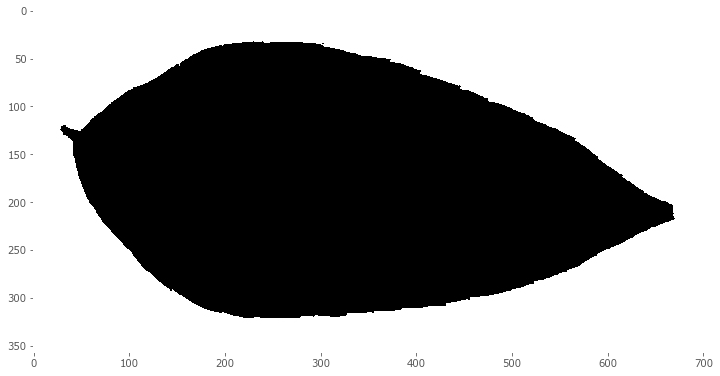

In [15]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [16]:
from scipy.misc import imresize

In [17]:
img_resized = imresize(img, (100, 100))

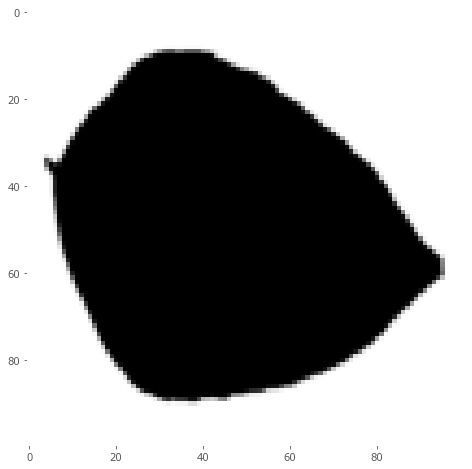

In [18]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [19]:
imgs=np.zeros((1585,10000))
for i in range(1,1585): #total - 1585
    filename=str(i)+'.jpg'
    filepath = os.path.join(IMG_DIR, filename)
    img = plt.imread(filepath)
    #print(img.shape)
    #plt.imshow(img, cmap='Greys')
    #plt.grid(None)
    img_resized = imresize(img, (100, 100))
    #plt.imshow(img_resized, cmap='Greys')
    #plt.grid(None)
    #arr=np.array(img_resized)
    img_data=np.ravel(img_resized)
    imgs[i]=img_data
print(imgs)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
imgs_train=np.zeros((len(train_idx), 10000))
for line, t_i in enumerate(train_idx):
    t_i=int(t_i)
    imgs_train[line]=imgs[t_i]
imgs_test=np.zeros((len(test_idx), 10000))
for line, test_i in enumerate(test_idx):
    test_i=int(test_i)
    imgs_test[line]=imgs[test_i]
#imgs_train=np.array((imgs[1:10]))

In [21]:
print(imgs_test)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

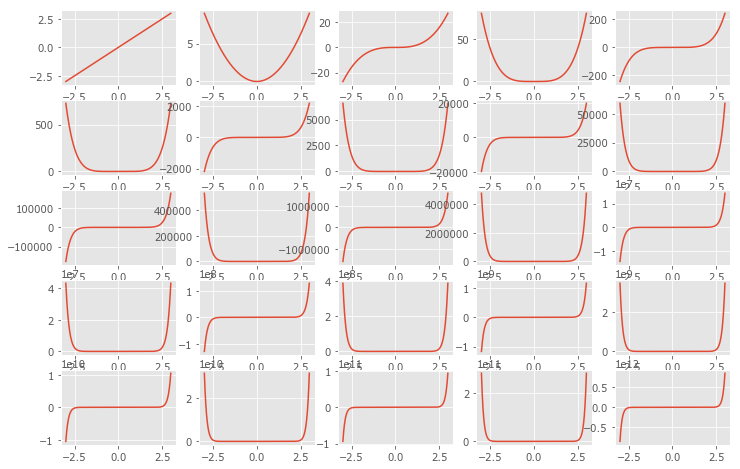

In [22]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

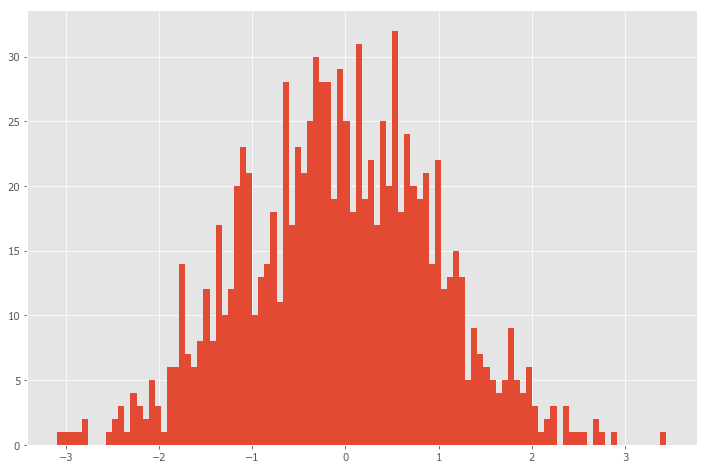

In [23]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

99


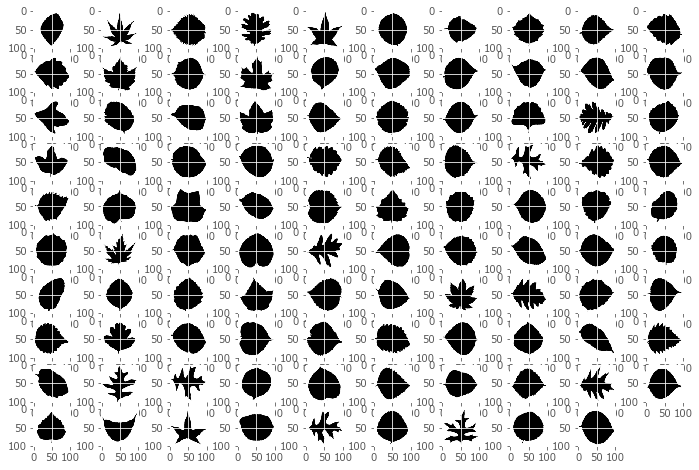

In [109]:
#xs = np.linspace(-3, 3, 1000)
orig=[]
orig_idx=[]
for idx, item in enumerate(y_train):
    if item not in orig:
        orig.append(item)
        orig_idx.append(idx)
print(len(orig_idx))
for i in range(1, 100):
    plt.subplot(10, 10, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    
    orig_i=orig_idx[i-1]
    #print(orig_i)
    img=imgs_train[orig_i]
    #print(img)
    img=np.reshape(img, (100,100))
    plt.imshow(img, cmap= "Greys")


In [25]:
import random
pixels= random.sample(set([i for i in range(len(imgs_train))]), 100)
print(pixels)
pxlrates=[]
for p in pixels:
    pxlrate=imgs_train[:, p]
    pxlrate=np.ravel(pxlrate)
    pxlrates.append(pxlrate)
print(pxlrates)

[581, 518, 529, 351, 316, 460, 642, 156, 740, 705, 99, 669, 426, 435, 537, 85, 221, 550, 119, 39, 668, 634, 166, 455, 458, 204, 772, 44, 174, 484, 544, 331, 779, 656, 471, 80, 35, 102, 127, 745, 547, 189, 483, 696, 313, 474, 737, 37, 218, 450, 688, 749, 241, 366, 297, 640, 151, 88, 396, 742, 748, 22, 727, 285, 24, 440, 295, 376, 619, 198, 405, 261, 220, 137, 298, 41, 781, 317, 27, 560, 536, 485, 613, 719, 8, 55, 229, 505, 329, 608, 706, 567, 278, 212, 53, 466, 475, 582, 365, 419]
[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
   

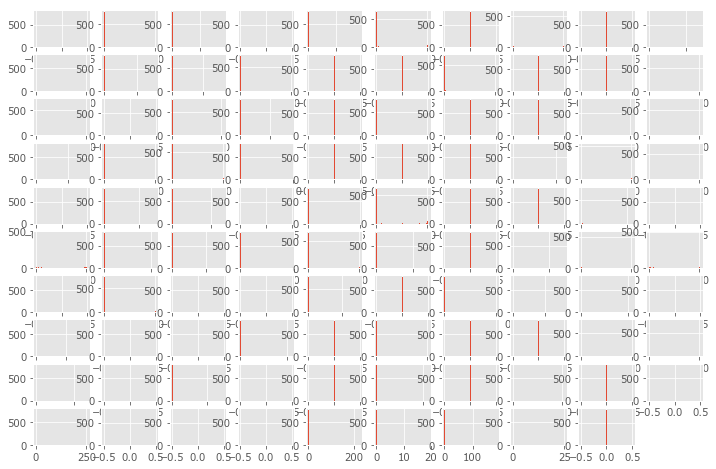

In [26]:
for i in range(1, 100): # числа от 1 до 25
    plt.subplot(10, 10, i)
    _ = plt.hist(pxlrates[i], bins = 100)

[ 0.  0.  0. ...,  0.  0.  0.]


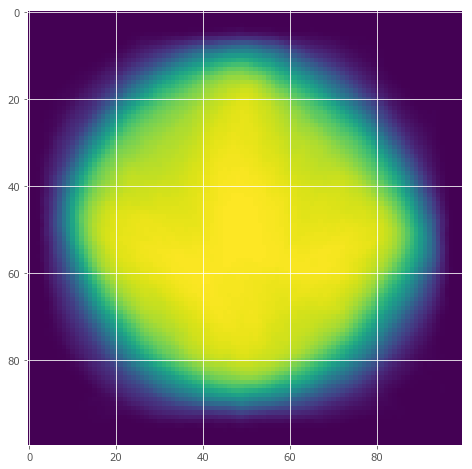

In [27]:
mean_pxl=np.mean(imgs_train, axis=0)
print(mean_pxl)
mean_pxl=np.reshape(mean_pxl, (100,100))
plt.imshow(mean_pxl)

[ 0.  0.  0. ...,  0.  0.  0.]


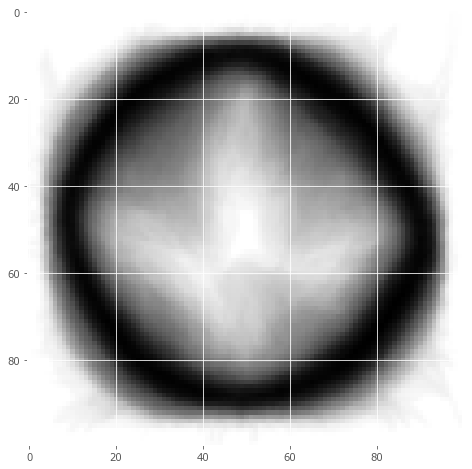

In [28]:
devs=np.std(imgs_train, axis=0)
print(devs)
devs=np.reshape(devs, (100,100))
plt.imshow(devs, cmap='Greys')

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

* Некоторые листья достаточно сильно отличаются от большинства, которое в целом имеет округлую форму. Можно выделить как минимум три класса визуальноы - округлые, с угловатыми частями листа по оси Х и с угловатыми частями листа по оси У (как, например, конопля)
* ???
* основываясь не на черно-белой, а на сине-желтой гамме, учитывая, что нет больших зон с переходными цветами, можно предположить, что бинаризация изображений вполне возможна без больших потерь. Исходя из "среднего" листа, можно предположить, что порог можно поставить достаточно низкий, например, 0.1
* Вполне похож, потому что он в целом напоминает кластер округлых листев. Поэтому и пиксели, которые принимают одно и то же значение, напоминают скорее форму округлых листьев

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [85]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=123)
new_imgs=tsne.fit_transform(imgs_train)

In [81]:
new_imgs

array([[ 12.02315771, -16.29143478],
       [-10.76502696,  18.71182033],
       [-10.58886241, -12.96456124],
       ..., 
       [-17.37616198,   4.63498108],
       [-17.81378016,  10.34940803],
       [-12.14222915,  -8.28495436]])

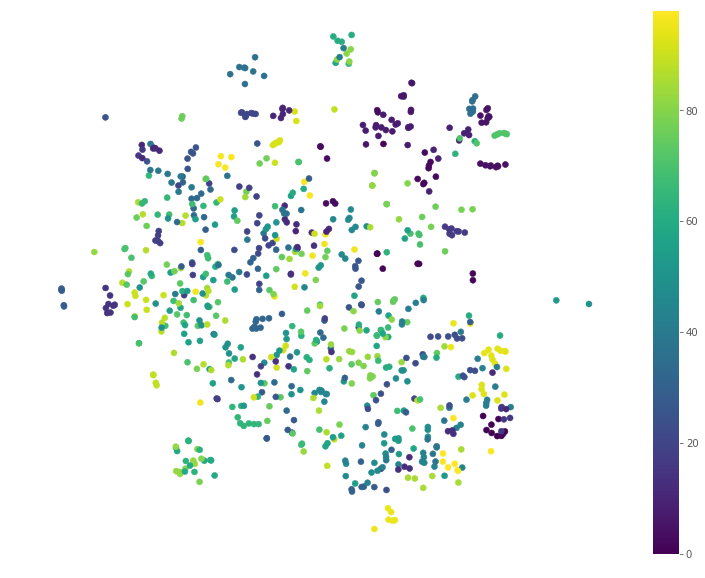

In [86]:

plt.figure(figsize=(13,10))
plt.scatter(new_imgs[:, 0], new_imgs[:, 1], c=y_train)
plt.axis('off')
plt.colorbar()
plt.show()

In [87]:
from scipy.spatial.distance import minkowski
x = [i[0] for i in new_imgs]
y = [j[1] for j in new_imgs]
print('p=1: '+str(minkowski(x, y, 1)))
print('p=2: '+str(minkowski(x, y, 2)))
print('p=np.infty: ' +str(minkowski(x, y, np.infty)))

p=1: 11424.0163369
p=2: 491.2666192642952
p=np.infty: 37.6300881082


Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

* можно сказать, что хорошо выделяются классы первой десятки (1-10), а также неплохо группируются классы последней десятки (80-90) 
* кажется, что нельзя.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit_predict(imgs_train)

array([1, 6, 4, 1, 6, 6, 4, 2, 1, 1, 3, 7, 4, 8, 5, 8, 1, 4, 0, 1, 7, 7, 0,
       2, 1, 7, 7, 8, 7, 3, 5, 6, 7, 1, 7, 3, 1, 2, 0, 7, 3, 8, 6, 5, 4, 4,
       7, 7, 0, 2, 4, 5, 1, 5, 5, 5, 7, 5, 7, 0, 5, 8, 1, 1, 1, 4, 1, 1, 5,
       5, 2, 6, 3, 8, 4, 5, 2, 4, 0, 4, 7, 5, 8, 6, 7, 1, 7, 4, 5, 5, 4, 4,
       1, 1, 0, 1, 7, 1, 8, 4, 3, 5, 8, 7, 0, 4, 3, 7, 1, 3, 7, 7, 3, 7, 2,
       5, 8, 1, 4, 1, 7, 3, 7, 0, 4, 5, 1, 3, 0, 8, 2, 3, 3, 8, 1, 1, 1, 5,
       4, 1, 7, 3, 1, 5, 5, 4, 7, 2, 3, 7, 4, 8, 7, 1, 1, 7, 1, 2, 1, 1, 4,
       3, 0, 7, 1, 3, 1, 5, 0, 3, 8, 8, 5, 8, 7, 0, 6, 1, 3, 1, 7, 5, 1, 7,
       1, 8, 5, 8, 8, 7, 7, 3, 1, 8, 2, 1, 8, 7, 1, 1, 5, 2, 2, 2, 5, 0, 1,
       1, 1, 0, 5, 1, 3, 1, 5, 8, 8, 7, 3, 5, 7, 8, 8, 5, 7, 4, 5, 7, 2, 8,
       1, 2, 3, 5, 1, 5, 7, 0, 2, 4, 7, 2, 1, 4, 8, 2, 6, 3, 4, 7, 4, 7, 3,
       7, 7, 2, 5, 2, 3, 5, 7, 5, 7, 7, 4, 0, 8, 2, 2, 6, 5, 7, 1, 2, 3, 7,
       5, 7, 7, 3, 5, 7, 4, 2, 7, 1, 6, 0, 5, 2, 1, 2, 5, 2, 1, 2, 5, 1, 3,
       1, 7,

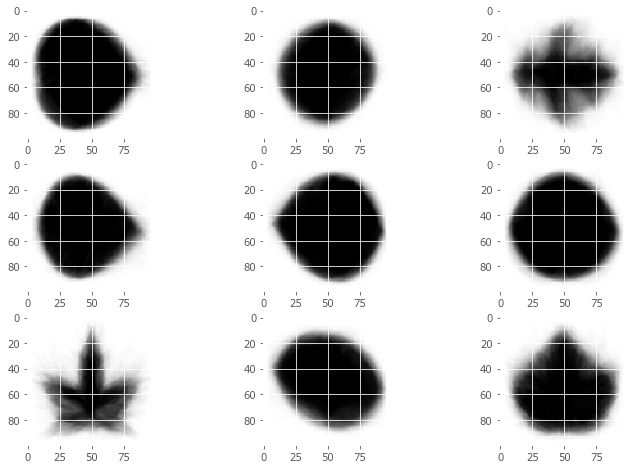

In [47]:
centers_9=np.array(kmeans.cluster_centers_)
for i in range(1,10): 
    plt.subplot(3, 3, i) 
    im=np.reshape(centers_9[i-1], (100,100))
    plt.imshow(im, cmap='Greys')


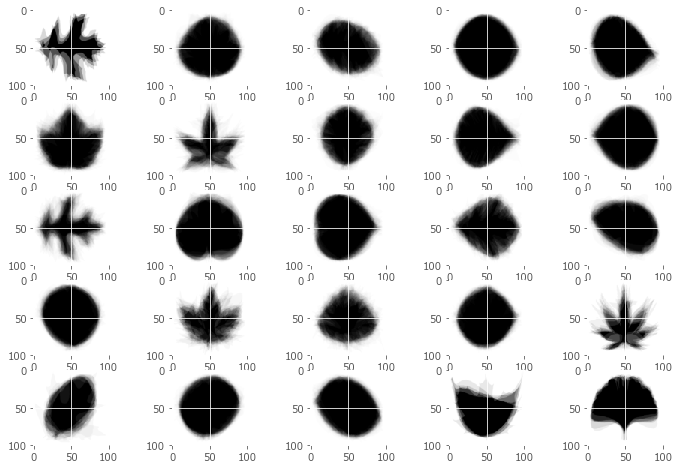

In [48]:
kmeans = KMeans(n_clusters=25, random_state=0)
kmeans.fit(imgs_train)
centers_25=np.array(kmeans.cluster_centers_)
for i in range(1,26): 
    plt.subplot(5, 5, i) 
    im=np.reshape(centers_25[i-1], (100,100))
    plt.imshow(im, cmap='Greys')

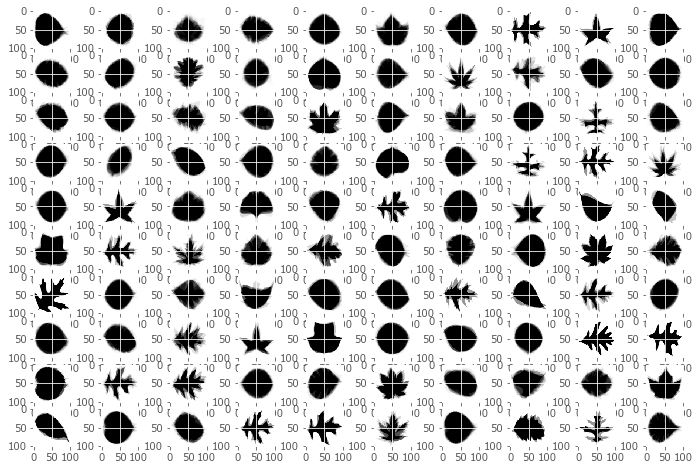

In [49]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(imgs_train)
centers_25=np.array(kmeans.cluster_centers_)
for i in range(1,101): 
    plt.subplot(10, 10, i) 
    im=np.reshape(centers_25[i-1], (100,100))
    plt.imshow(im, cmap='Greys')

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

* чем больше вводится кластеров, тем больше они напоминают листья
* отличие в том, что в картинках намного меньше оттенков серого. Видимо, это происходит из-за того, что картинка - конкретное изображение предмета, в то время как центр кластера оперирует частотой вхождения какого-то пикселя, поэтому разных оттенков серого намного больше.
* Среди кластеров есть похожие и практически повторяющиеся
* мне кажется, под эти данные оптимально подходит 25 кластеров, так как с одной стороны, не порождается большого количества очень похожих (как в случае со 100 кластерами), а с другой, разделяются основные типы (в отличие от 9 кластеров).

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

Accuracy is equal to: 0.550505050505


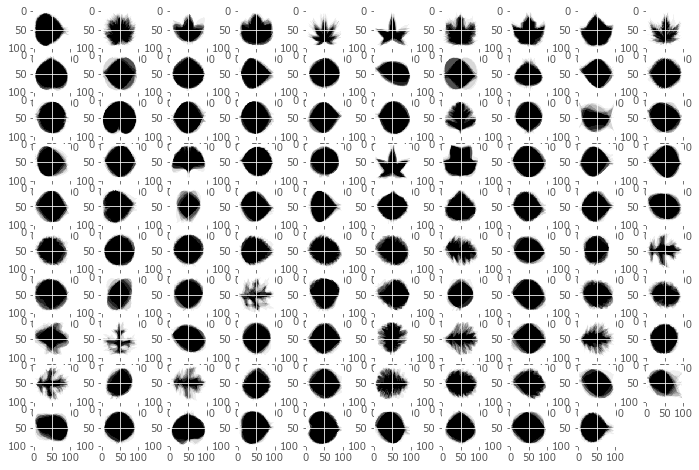

In [52]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import accuracy_score
clf = NearestCentroid()
clf.fit(imgs_train, y_train)
y_pred=clf.predict(imgs_test)
print('Accuracy is equal to: '+str(accuracy_score(y_test, y_pred)))
centers=clf.centroids_
for i in range(1,100):
    img=centers[i-1]
    img=np.reshape(img, (100,100))
    plt.subplot(10,10, i)
    plt.imshow(img, cmap='Greys')

Accuracy is equal to: 0.494949494949


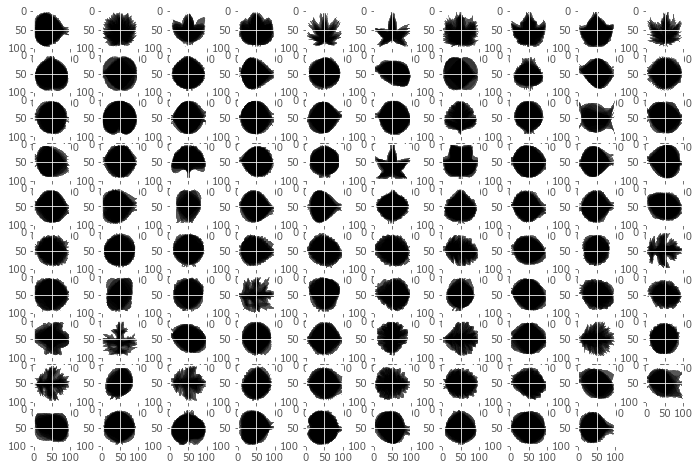

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(imgs_train, y_train)
y_pred=clf.predict(imgs_test)
print('Accuracy is equal to: '+str(accuracy_score(y_test, y_pred)))
logs=clf.feature_log_prob_ 
#print(logs)
for i in range(1,100):
    log=logs[i-1]
    log=np.reshape(log, (100,100))
    plt.subplot(10,10,i)
    plt.imshow(log, cmap='Greys')

Accuracy is equal to: 0.626262626263


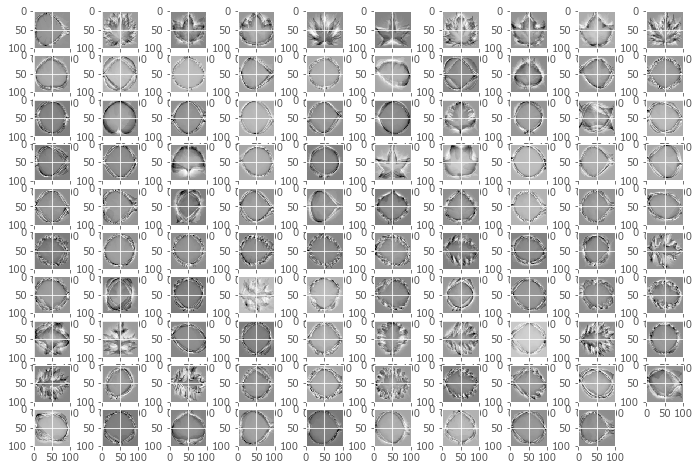

In [59]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(imgs_train, y_train)
lr_pred=logreg.predict(imgs_test)
print('Accuracy is equal to: '+str(accuracy_score(y_test, lr_pred)))
imgs=logreg.coef_
for i in range(1,100):
    img=imgs[i-1]
    img=np.reshape(img, (100,100))
    plt.subplot(10,10,i)
    plt.imshow(img, cmap='Greys')

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

* c точки зрения метрики лучше всего работает регрессия, однако внешне кажется, что лучше всего работает наивный Байес
* Больше всего похожи на изображения листьев вероятности из наивного Байеса.
* Возможно, это происходит из-за того, что серый - фоновый цвет в весах классификатора - указывает на какой-то базовый вес, не являющийся ни очень важным, ни совсем неважным, а уход в черный или белый обозначает отклонение от этого "дефолтного" веса. 

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

Accuracy is equal to: 0.424242424242


(-0.5, 99.5, 99.5, -0.5)

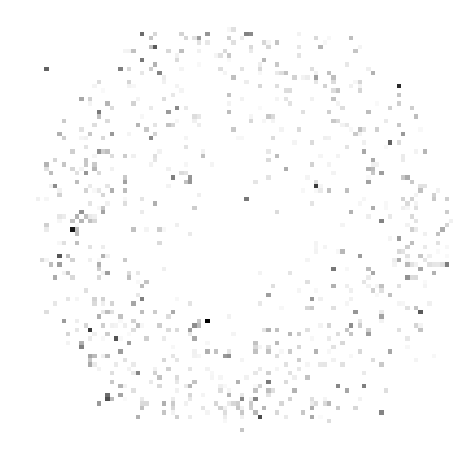

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10, random_state=123)
rf.fit(imgs_train, y_train)
rf_pred=rf.predict(imgs_test)
print('Accuracy is equal to: '+str(accuracy_score(y_test, rf_pred)))
rf_leaf=rf.feature_importances_
leaf=np.reshape(rf_leaf, (100,100))
plt.imshow(leaf, cmap='Greys')
plt.grid(None)
plt.axis("off")

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

* при отдаленном рассмотрении картинка напоминает "средний лист"
* Соответствует так же, как и "средний лист" и разброс листа при выборке - нечто похожее на правду есть. Однако кажется, что выделенные лесом неважные признаки действительно не очень важны для классификации - это либо самый центр, почти всегда занятый листом, либо края, которые листом почти никогда не заняты.

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [70]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha=0.5)
bnb.fit(imgs_train, y_train)
bnb_pred=bnb.predict(imgs_test)
print('Accuracy = '+str(accuracy_score(y_pred, bnb_pred)))

Accuracy = 0.737373737374


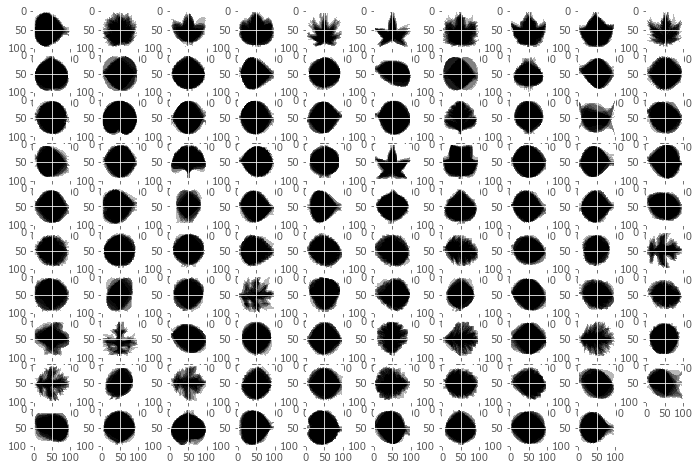

In [71]:
imgs=bnb.feature_log_prob_
for i in range(1,100):
    img=imgs[i-1]
    img=np.reshape(img, (100,100))
    plt.subplot(10,10,i)
    plt.imshow(img, cmap='Greys')

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

* качество улучшилось, возможно, из-за введенного порога (лучше всего - пороги в районе 0.1 - 0.5)
* если порог равен 1, то картинки максимально похожи на листья. При меньшей альфа, неокруглые листья становятся более размытыми.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [105]:
num_components = 2**np.arange(8)

1
2
4
8
16
32
64
128


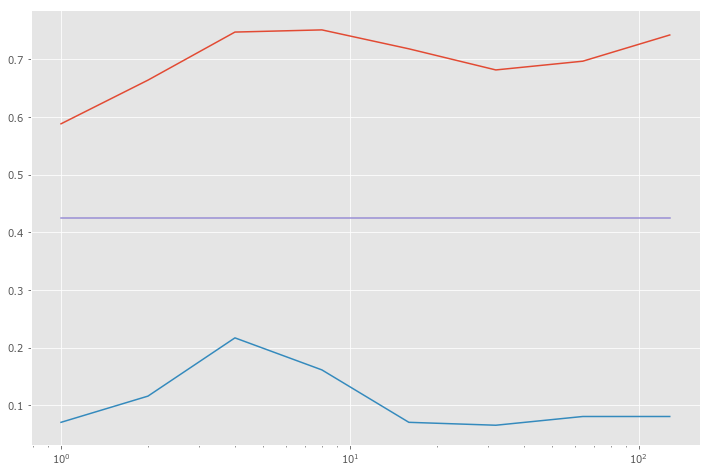

In [106]:
from sklearn.decomposition import PCA
train_accur=[]
test_accur=[]
third_line=[]
comparison=rf.fit(imgs_train, y_train).predict(imgs_test)
for n in num_components:
    print(n)
    pca=PCA(n_components=n)
    a=pca.fit_transform(imgs_train)
    pca_pred=pca.fit_transform(imgs_test)
    rf=RandomForestClassifier(max_depth=10, random_state=123)
    b=rf.fit(a,y_train)
    c=rf.predict(a)
    
    rf_pred=rf.predict(pca_pred)
    train_accur.append(accuracy_score(y_train, c))
    test_accur.append(accuracy_score(y_test, rf_pred))
    third_line.append(accuracy_score(y_test,comparison))
plt.plot(num_components, train_accur)
plt.plot(num_components, test_accur)
plt.plot(num_components, third_line)
plt.xscale("log")

In [107]:
print(test_accur)

[0.070707070707070704, 0.11616161616161616, 0.21717171717171718, 0.16161616161616163, 0.070707070707070704, 0.065656565656565663, 0.080808080808080815, 0.080808080808080815]


Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

* на выборке до 128 признаков это можно предположить
* Максимальное число на контроле достигается на 4 компонентах. Значение отличается от качества на всех признаках, так как оно варьируется сильнее.

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [ ]:
from sklearn.feature_selection import SelectKBest

Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.